In [1]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [26]:
!python ../scripts/chest_imagenome/precompute_bbox_phrase_embeddings.py \
--model_name "microsoft/BiomedVLP-CXR-BERT-specialized" \
--model_checkpoint_folder_path \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231018_230637_MIMIC-CXR(triplets+classif+entcont+nli+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)"

Obtaining embeddings for each sentence...
checkpoint_names = ['checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9248.pt']
  0%|                                                    | 0/36 [00:00<?, ?it/s]Loading cached text embeddings from /mnt/workspace/pamessina/medvqa-workspace/cache/text_embeddings_cache(hash=426,702090393457262989).pkl
len(self.cache["hashes"]) = 36
self.cache["embeddings"].shape = (36, 128)
100%|████████████████████████████████████████| 36/36 [00:00<00:00, 80702.80it/s]
Saving output to: /mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl
Done!


In [ ]:
# "/mnt/data/pamessina/workspaces/medvqa-workspace/models/visual_module/20230608_153404_mim+vinbig_yolov8l_dws=1.0,0.5" \

In [5]:
!python ../train_phrase_grounding.py \
--pretrained_checkpoint_folder_paths \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231122_073114_chst-img-anat_PhraseGrounder(yolov8l,128,256)" \
--epochs 200 \
--batches_per_epoch 250 \
--max_images_per_batch 100 \
--max_phrases_per_batch 2000 \
--max_phrases_per_image 20 \
--val_batch_size_factor 3 \
--image_size 416 416 \
--image_local_feat_size 512 \
--num_regions 169 \
--regions_width 13 \
--regions_height 13 \
--yolov8_model_name_or_path "yolov8l.pt" \
--yolov8_model_alias "yolov8l" \
--phrase_embedding_size 128 \
--qkv_size 256 \
--phrase_classifier_hidden_size 256 \
--num_train_workers 3 \
--num_val_workers 3 \
--iters_to_accumulate 10 \
--optimizer_name "adamw" \
--scheduler "exp-warmup+decay+cyclicdecay" \
--lr 1e-6 \
--warmup_decay_and_cyclic_decay_args "1e-6,3,1e-4,8,5e-6,1e-4,8,5e-6" \
--use_chest_imagenome_for_train \
--use_chest_imagenome_gold_for_test \
--chest_imagenome_bbox_phrase_embeddings_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl" \
--attention_supervision_loss_weight 3.0 \
--phrase_classifier_loss_weight 1.0 \
--use_amp \
--save

script's arguments:
   epochs: 200
   batches_per_epoch: 250
   max_images_per_batch: 100
   max_phrases_per_batch: 2000
   max_phrases_per_image: 20
   val_batch_size_factor: 3
   checkpoint_folder: None
   pretrained_checkpoint_folder_path: None
   pretrained_checkpoint_folder_paths: ['/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231122_073114_chst-img-anat_PhraseGrounder(yolov8l,128,256)']
   freeze_image_encoder: False
   raw_image_encoding: yolov8
   num_regions: 169
   image_local_feat_size: 512
   image_encoder_pretrained_weights_path: None
   yolov8_model_name_or_path: yolov8l.pt
   yolov8_model_alias: yolov8l
   yolov8_use_one_detector_per_dataset: False
   phrase_embedding_size: 128
   regions_width: 13
   regions_height: 13
   qkv_size: 256
   phrase_classifier_hidden_size: 256
   optimizer_name: adamw
   lr: 1e-06
   scheduler: exp-warmup+decay+cyclicdecay
   lr_decay: 0.76
   lr_decay_patience: 2
   warmup_and_decay_args: None
   warmup_and_cos

227835it [00:02, 81826.69it/s]
Total number of images: 1000
--------------------------------------------------
7) Creating dataloaders ...
len(_train_dataloaders) = 1
len(_val_dataloaders) = 1
_train_weights = [1.0]
merged_dataset_name = chst-img-anat
--------------------------------------------------
8) Attaching metrics, losses, timer and events to engines ...
--------------------------------------------------
9) Defining learning rate scheduler handler ...
--------------------------------------------------
10) Defining learning rate scheduler handler ...
--------------------------------------------------
11) Defining checkpoint folder path ...
checkpoint_folder_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231122_083436_chst-img-anat_PhraseGrounder(yolov8l,128,256)
metadata saved to /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231122_083436_chst-img-anat_PhraseGrounder(yolov8l,128,256)/metadata.json
--------------------

chestimgbbiou 0.94582, phrase_acc 0.99573, segmask_iou 0.22102, 20.74 secs
---- Epoch 16/200
(1) Training stage (lr = 0.000028) ...
loss 3.37430, y8_loss 2.37355, y8box_loss 0.82945, y8cls_loss 0.41870, y8dfl_loss 1.12540, phrase_acc 0.99226, phrcls_loss 0.02764, att_sup_loss 0.97312, segmask_iou 0.28722, 138.58 secs
(2) Validation stage ...
chestimgbbiou 0.96331, phrase_acc 0.99831, segmask_iou 0.24042, 21.80 secs
New checkpoint saved: checkpoint_16_chestimgbbiou+phrase_acc+segmask_iou=0.7246.pt
---- Epoch 17/200
(1) Training stage (lr = 0.000018) ...
loss 3.34299, y8_loss 2.35910, y8box_loss 0.82261, y8cls_loss 0.41430, y8dfl_loss 1.12219, phrase_acc 0.99238, phrcls_loss 0.02717, att_sup_loss 0.95673, segmask_iou 0.28852, 136.03 secs
(2) Validation stage ...
chestimgbbiou 0.96937, phrase_acc 0.99842, segmask_iou 0.24602, 22.99 secs
New checkpoint saved: checkpoint_17_chestimgbbiou+phrase_acc+segmask_iou=0.7282.pt
---- Epoch 18/200
(1) Training stage (lr = 0.000012) ...
loss 3.31731, 

New checkpoint saved: checkpoint_36_chestimgbbiou+phrase_acc+segmask_iou=0.7410.pt
---- Epoch 37/200
(1) Training stage (lr = 0.000100) ...
loss 3.10274, y8_loss 2.35865, y8box_loss 0.82688, y8cls_loss 0.41126, y8dfl_loss 1.12050, phrase_acc 0.99342, phrcls_loss 0.02088, att_sup_loss 0.72322, segmask_iou 0.32564, 139.77 secs
(2) Validation stage ...
chestimgbbiou 0.90290, phrase_acc 0.90004, segmask_iou 0.16878, 17.81 secs
---- Epoch 38/200
(1) Training stage (lr = 0.000065) ...
loss 3.05903, y8_loss 2.33872, y8box_loss 0.81700, y8cls_loss 0.40698, y8dfl_loss 1.11473, phrase_acc 0.99346, phrcls_loss 0.02060, att_sup_loss 0.69971, segmask_iou 0.33736, 140.53 secs
(2) Validation stage ...
chestimgbbiou 0.93299, phrase_acc 0.98665, segmask_iou 0.22886, 19.96 secs
---- Epoch 39/200
(1) Training stage (lr = 0.000042) ...
loss 3.02550, y8_loss 2.31752, y8box_loss 0.80671, y8cls_loss 0.40165, y8dfl_loss 1.10916, phrase_acc 0.99295, phrcls_loss 0.02149, att_sup_loss 0.68650, segmask_iou 0.3473

loss 2.76046, y8_loss 2.22399, y8box_loss 0.76525, y8cls_loss 0.37452, y8dfl_loss 1.08422, phrase_acc 0.99546, phrcls_loss 0.01413, att_sup_loss 0.52234, segmask_iou 0.43626, 135.75 secs
(2) Validation stage ...
chestimgbbiou 0.97027, phrase_acc 0.99588, segmask_iou 0.41078, 21.98 secs
New checkpoint saved: checkpoint_58_chestimgbbiou+phrase_acc+segmask_iou=0.7847.pt
---- Epoch 59/200
(1) Training stage (lr = 0.000008) ...
loss 2.75587, y8_loss 2.22149, y8box_loss 0.76427, y8cls_loss 0.37342, y8dfl_loss 1.08380, phrase_acc 0.99521, phrcls_loss 0.01497, att_sup_loss 0.51941, segmask_iou 0.43695, 135.29 secs
(2) Validation stage ...
chestimgbbiou 0.97313, phrase_acc 0.99627, segmask_iou 0.41369, 22.59 secs
New checkpoint saved: checkpoint_59_chestimgbbiou+phrase_acc+segmask_iou=0.7865.pt
---- Epoch 60/200
(1) Training stage (lr = 0.000005) ...
loss 2.75185, y8_loss 2.21847, y8box_loss 0.76288, y8cls_loss 0.37275, y8dfl_loss 1.08283, phrase_acc 0.99521, phrcls_loss 0.01518, att_sup_loss 0

chestimgbbiou 0.95139, phrase_acc 0.99665, segmask_iou 0.43250, 22.09 secs
---- Epoch 80/200
(1) Training stage (lr = 0.000028) ...
loss 2.60138, y8_loss 2.20464, y8box_loss 0.75858, y8cls_loss 0.36811, y8dfl_loss 1.07795, phrase_acc 0.99570, phrcls_loss 0.01277, att_sup_loss 0.38397, segmask_iou 0.51069, 137.45 secs
(2) Validation stage ...
chestimgbbiou 0.96821, phrase_acc 0.99658, segmask_iou 0.47640, 22.62 secs
New checkpoint saved: checkpoint_80_chestimgbbiou+phrase_acc+segmask_iou=0.8077.pt
---- Epoch 81/200
(1) Training stage (lr = 0.000018) ...
loss 2.60171, y8_loss 2.20469, y8box_loss 0.75803, y8cls_loss 0.36803, y8dfl_loss 1.07863, phrase_acc 0.99535, phrcls_loss 0.01414, att_sup_loss 0.38288, segmask_iou 0.51094, 138.72 secs
(2) Validation stage ...
chestimgbbiou 0.95988, phrase_acc 0.99069, segmask_iou 0.46838, 22.12 secs
---- Epoch 82/200
(1) Training stage (lr = 0.000012) ...
loss 2.58346, y8_loss 2.19298, y8box_loss 0.75299, y8cls_loss 0.36439, y8dfl_loss 1.07561, phrase

loss 2.61025, y8_loss 2.25700, y8box_loss 0.78485, y8cls_loss 0.37986, y8dfl_loss 1.09228, phrase_acc 0.99529, phrcls_loss 0.01430, att_sup_loss 0.33896, segmask_iou 0.54137, 137.28 secs
(2) Validation stage ...
chestimgbbiou 0.90129, phrase_acc 0.45935, segmask_iou 0.13709, 13.36 secs
---- Epoch 102/200
(1) Training stage (lr = 0.000065) ...
loss 2.59445, y8_loss 2.24989, y8box_loss 0.78195, y8cls_loss 0.37755, y8dfl_loss 1.09039, phrase_acc 0.99526, phrcls_loss 0.01409, att_sup_loss 0.33047, segmask_iou 0.54511, 141.01 secs
(2) Validation stage ...
chestimgbbiou 0.93831, phrase_acc 0.88935, segmask_iou 0.40482, 22.58 secs
---- Epoch 103/200
(1) Training stage (lr = 0.000042) ...
loss 2.54465, y8_loss 2.21120, y8box_loss 0.76333, y8cls_loss 0.36859, y8dfl_loss 1.07928, phrase_acc 0.99568, phrcls_loss 0.01225, att_sup_loss 0.32120, segmask_iou 0.54843, 141.23 secs
(2) Validation stage ...
chestimgbbiou 0.91736, phrase_acc 0.88815, segmask_iou 0.33198, 17.98 secs
---- Epoch 104/200
(1) 

loss 2.41840, y8_loss 2.12505, y8box_loss 0.72509, y8cls_loss 0.34322, y8dfl_loss 1.05674, phrase_acc 0.99618, phrcls_loss 0.01079, att_sup_loss 0.28256, segmask_iou 0.56386, 142.15 secs
(2) Validation stage ...
chestimgbbiou 0.97239, phrase_acc 0.99554, segmask_iou 0.54485, 24.69 secs
New checkpoint saved: checkpoint_123_chestimgbbiou+phrase_acc+segmask_iou=0.8318.pt
---- Epoch 124/200
(1) Training stage (lr = 0.000005) ...
loss 2.35681, y8_loss 2.07387, y8box_loss 0.69956, y8cls_loss 0.33118, y8dfl_loss 1.04313, phrase_acc 0.99652, phrcls_loss 0.00974, att_sup_loss 0.27320, segmask_iou 0.56641, 144.88 secs
(2) Validation stage ...
chestimgbbiou 0.97143, phrase_acc 0.99335, segmask_iou 0.54101, 23.78 secs
---- Epoch 125/200
(1) Training stage (lr = 0.000100) ...
loss 2.48119, y8_loss 2.17713, y8box_loss 0.74997, y8cls_loss 0.35821, y8dfl_loss 1.06895, phrase_acc 0.99611, phrcls_loss 0.01116, att_sup_loss 0.29289, segmask_iou 0.56266, 145.49 secs
(2) Validation stage ...
chestimgbbiou 

In [6]:
!python ../train_phrase_grounding.py \
--pretrained_checkpoint_folder_paths \
"/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231122_083436_chst-img-anat_PhraseGrounder(yolov8l,128,256)" \
--epochs 80 \
--batches_per_epoch 250 \
--max_images_per_batch 100 \
--max_phrases_per_batch 2000 \
--max_phrases_per_image 20 \
--val_batch_size_factor 3 \
--image_size 416 416 \
--image_local_feat_size 512 \
--num_regions 169 \
--regions_width 13 \
--regions_height 13 \
--yolov8_model_name_or_path "yolov8l.pt" \
--yolov8_model_alias "yolov8l" \
--phrase_embedding_size 128 \
--qkv_size 256 \
--phrase_classifier_hidden_size 256 \
--num_train_workers 3 \
--num_val_workers 3 \
--iters_to_accumulate 10 \
--optimizer_name "adamw" \
--scheduler "exp-warmup+decay+cyclicdecay" \
--lr 1e-6 \
--warmup_decay_and_cyclic_decay_args "1e-6,3,7e-5,8,2e-6,7e-5,8,2e-6" \
--use_chest_imagenome_for_train \
--use_chest_imagenome_gold_for_test \
--chest_imagenome_bbox_phrase_embeddings_filepath \
"/mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl" \
--attention_supervision_loss_weight 3.0 \
--phrase_classifier_loss_weight 1.0 \
--use_amp \
--save

script's arguments:
   epochs: 80
   batches_per_epoch: 250
   max_images_per_batch: 100
   max_phrases_per_batch: 2000
   max_phrases_per_image: 20
   val_batch_size_factor: 3
   checkpoint_folder: None
   pretrained_checkpoint_folder_path: None
   pretrained_checkpoint_folder_paths: ['/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231122_083436_chst-img-anat_PhraseGrounder(yolov8l,128,256)']
   freeze_image_encoder: False
   raw_image_encoding: yolov8
   num_regions: 169
   image_local_feat_size: 512
   image_encoder_pretrained_weights_path: None
   yolov8_model_name_or_path: yolov8l.pt
   yolov8_model_alias: yolov8l
   yolov8_use_one_detector_per_dataset: False
   phrase_embedding_size: 128
   regions_width: 13
   regions_height: 13
   qkv_size: 256
   phrase_classifier_hidden_size: 256
   optimizer_name: adamw
   lr: 1e-06
   scheduler: exp-warmup+decay+cyclicdecay
   lr_decay: 0.76
   lr_decay_patience: 2
   warmup_and_decay_args: None
   warmup_and_cosi

227835it [00:03, 59883.09it/s]
Total number of images: 1000
--------------------------------------------------
7) Creating dataloaders ...
len(_train_dataloaders) = 1
len(_val_dataloaders) = 1
_train_weights = [1.0]
merged_dataset_name = chst-img-anat
--------------------------------------------------
8) Attaching metrics, losses, timer and events to engines ...
--------------------------------------------------
9) Defining learning rate scheduler handler ...
--------------------------------------------------
10) Defining learning rate scheduler handler ...
--------------------------------------------------
11) Defining checkpoint folder path ...
checkpoint_folder_path = /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231122_141052_chst-img-anat_PhraseGrounder(yolov8l,128,256)
metadata saved to /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231122_141052_chst-img-anat_PhraseGrounder(yolov8l,128,256)/metadata.json
--------------------

chestimgbbiou 0.97021, phrase_acc 0.99627, segmask_iou 0.55036, 23.17 secs
---- Epoch 18/80
(1) Training stage (lr = 0.000006) ...
loss 2.32512, y8_loss 2.05825, y8box_loss 0.69324, y8cls_loss 0.32662, y8dfl_loss 1.03839, phrase_acc 0.99676, phrcls_loss 0.00884, att_sup_loss 0.25803, segmask_iou 0.57294, 143.91 secs
(2) Validation stage ...
chestimgbbiou 0.97001, phrase_acc 0.99262, segmask_iou 0.54652, 23.01 secs
---- Epoch 19/80
(1) Training stage (lr = 0.000003) ...
loss 2.28307, y8_loss 2.02276, y8box_loss 0.67550, y8cls_loss 0.31856, y8dfl_loss 1.02870, phrase_acc 0.99709, phrcls_loss 0.00859, att_sup_loss 0.25172, segmask_iou 0.57422, 142.09 secs
(2) Validation stage ...
chestimgbbiou 0.97210, phrase_acc 0.99477, segmask_iou 0.54789, 23.17 secs
---- Epoch 20/80
(1) Training stage (lr = 0.000002) ...
loss 2.28141, y8_loss 2.02323, y8box_loss 0.67588, y8cls_loss 0.31812, y8dfl_loss 1.02922, phrase_acc 0.99756, phrcls_loss 0.00728, att_sup_loss 0.25089, segmask_iou 0.57470, 141.50 s

loss 2.28164, y8_loss 2.03050, y8box_loss 0.68171, y8cls_loss 0.31819, y8dfl_loss 1.03060, phrase_acc 0.99697, phrcls_loss 0.00850, att_sup_loss 0.24264, segmask_iou 0.57700, 142.72 secs
(2) Validation stage ...
chestimgbbiou 0.95743, phrase_acc 0.99700, segmask_iou 0.51931, 22.19 secs
---- Epoch 41/80
(1) Training stage (lr = 0.000009) ...
loss 2.26205, y8_loss 2.01575, y8box_loss 0.67481, y8cls_loss 0.31366, y8dfl_loss 1.02728, phrase_acc 0.99735, phrcls_loss 0.00749, att_sup_loss 0.23881, segmask_iou 0.57836, 144.49 secs
(2) Validation stage ...
chestimgbbiou 0.96940, phrase_acc 0.99731, segmask_iou 0.55189, 24.81 secs
---- Epoch 42/80
(1) Training stage (lr = 0.000006) ...
loss 2.26256, y8_loss 2.01580, y8box_loss 0.67484, y8cls_loss 0.31453, y8dfl_loss 1.02643, phrase_acc 0.99740, phrcls_loss 0.00757, att_sup_loss 0.23919, segmask_iou 0.57768, 144.71 secs
(2) Validation stage ...
chestimgbbiou 0.97306, phrase_acc 0.99581, segmask_iou 0.55173, 24.98 secs
---- Epoch 43/80
(1) Traini

chestimgbbiou 0.95978, phrase_acc 0.99673, segmask_iou 0.52327, 22.98 secs
---- Epoch 64/80
(1) Training stage (lr = 0.000015) ...
loss 2.25277, y8_loss 2.01436, y8box_loss 0.67558, y8cls_loss 0.31303, y8dfl_loss 1.02574, phrase_acc 0.99748, phrcls_loss 0.00716, att_sup_loss 0.23126, segmask_iou 0.58030, 143.02 secs
(2) Validation stage ...
chestimgbbiou 0.96307, phrase_acc 0.99262, segmask_iou 0.53757, 24.85 secs
---- Epoch 65/80
(1) Training stage (lr = 0.000009) ...
loss 2.23643, y8_loss 1.99991, y8box_loss 0.66761, y8cls_loss 0.30955, y8dfl_loss 1.02275, phrase_acc 0.99735, phrcls_loss 0.00748, att_sup_loss 0.22905, segmask_iou 0.58089, 145.09 secs
(2) Validation stage ...
chestimgbbiou 0.97115, phrase_acc 0.99627, segmask_iou 0.54747, 23.41 secs
---- Epoch 66/80
(1) Training stage (lr = 0.000006) ...
loss 2.22693, y8_loss 1.99217, y8box_loss 0.66434, y8cls_loss 0.30750, y8dfl_loss 1.02032, phrase_acc 0.99738, phrcls_loss 0.00757, att_sup_loss 0.22719, segmask_iou 0.58078, 145.42 s

In [7]:
from medvqa.utils.files import load_pickle

In [8]:
tmp = load_pickle("/mnt/workspace/pamessina/medvqa-workspace/cache/chest_imagenome/bbox_phrase_embeddings.pkl")

In [9]:
tmp

{'bbox_phrases': ['right lung',
  'right upper lung zone',
  'right mid lung zone',
  'right lower lung zone',
  'right hilar structures',
  'right apical zone',
  'right costophrenic angle',
  'right cardiophrenic angle',
  'right hemidiaphragm',
  'left lung',
  'left upper lung zone',
  'left mid lung zone',
  'left lower lung zone',
  'left hilar structures',
  'left apical zone',
  'left costophrenic angle',
  'left hemidiaphragm',
  'trachea',
  'spine',
  'right clavicle',
  'left clavicle',
  'aortic arch',
  'mediastinum',
  'upper mediastinum',
  'svc',
  'cardiac silhouette',
  'left cardiac silhouette',
  'right cardiac silhouette',
  'cavoatrial junction',
  'right atrium',
  'descending aorta',
  'carina',
  'left upper abdomen',
  'right upper abdomen',
  'abdomen',
  'left cardiophrenic angle'],
 'bbox_phrase_embeddings': array([[ 0.02496161, -0.11734659, -0.14766279, ...,  0.05777274,
         -0.01930645, -0.07699747],
        [-0.00827154, -0.03769462, -0.2242293 , .

In [11]:
tmp['bbox_phrase_embeddings'][tmp['bbox_phrases'].index('left costophrenic angle')]

array([ 0.08340865,  0.02367862,  0.14119603,  0.03490549, -0.10620925,
       -0.09415937,  0.20432746,  0.03288333,  0.11559146,  0.02642535,
        0.07423049,  0.01118649,  0.03745568,  0.16563644,  0.02679495,
       -0.05521144,  0.07574613, -0.15395759, -0.00039241, -0.07679947,
       -0.11229552,  0.03641828,  0.02017207,  0.05440543, -0.00881156,
       -0.0560982 , -0.03263479,  0.08778685, -0.15292042, -0.00966011,
        0.01818974, -0.01665347, -0.13596593, -0.00429554, -0.00643928,
       -0.08431558, -0.22187845,  0.04606682, -0.03226773,  0.07784209,
       -0.17837323,  0.05961118,  0.18256645, -0.03329398, -0.02044875,
       -0.02756353, -0.09885427,  0.16357492, -0.13450697, -0.06229005,
       -0.04000686,  0.14386389,  0.07621111, -0.01741948, -0.13223149,
        0.07623185, -0.11843185,  0.10924952,  0.0860336 ,  0.05083549,
       -0.03296321,  0.1191605 ,  0.04233433,  0.04641148,  0.03145321,
       -0.03587761,  0.00105093, -0.10806032,  0.09650519,  0.15

In [12]:
tmp2 = load_pickle('/mnt/workspace/pamessina/medvqa-workspace/cache/mimiccxr/bbox_coords_and_presence_and_mask(13,13,243310).pkl')

In [13]:
tmp2.keys()

dict_keys(['dicom_ids', 'bbox_coords', 'bbox_presence', 'phrase_grounding_masks'])

In [17]:
from medvqa.datasets.mimiccxr.mimiccxr_phrase_grounding_dataset_management import visualize_mask
from medvqa.datasets.chest_imagenome.chest_imagenome_dataset_management import visualize_ground_truth_bounding_boxes

In [16]:
tmp2['phrase_grounding_masks'][0].shape

(36, 169)

Image path: /mnt/data/mimic-cxr-jpg/images/p15/p15567127/s55519669/ffc6b502-4bc15b04-84915927-6252a020-778ae624.jpg
Object: right lung (163.0, 449.0, 1130.0, 1538.0) (valid)
Object: right upper lung zone (462.0, 517.0, 831.0, 667.0) (valid)
Object: right mid lung zone (313.0, 1184.0, 912.0, 286.0) (valid)
Object: right lower lung zone (163.0, 1470.0, 1021.0, 517.0) (valid)
Object: right hilar structures (776.0, 1116.0, 490.0, 409.0) (valid)
Object: right apical zone (558.0, 449.0, 735.0, 490.0) (valid)
Object: right costophrenic angle (81.0, 1661.0, 273.0, 272.0) (valid)
Object: right cardiophrenic angle (803.0, 1484.0, 150.0, 435.0) (valid)
Object: right hemidiaphragm (163.0, 1565.0, 1130.0, 422.0) (valid)
Object: left lung (1320.0, 449.0, 1130.0, 1538.0) (valid)
Object: left upper lung zone (1320.0, 517.0, 831.0, 667.0) (valid)
Object: left mid lung zone (1388.0, 1184.0, 913.0, 286.0) (valid)
Object: left lower lung zone (1429.0, 1470.0, 1021.0, 517.0) (valid)
Object: left hilar stru

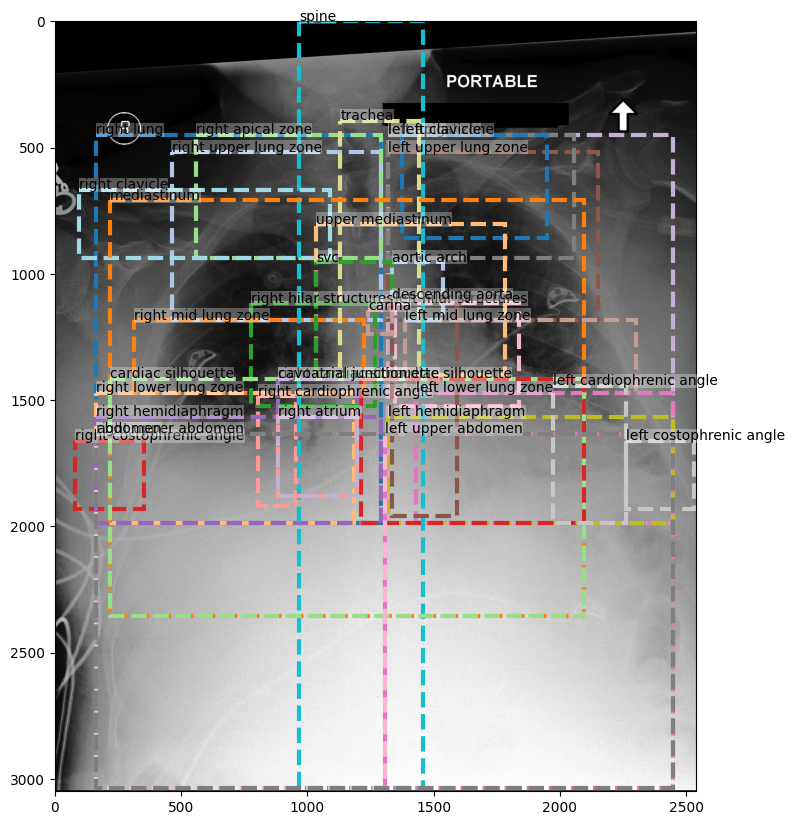

In [70]:
i = -200
did = tmp2['dicom_ids'][i]
visualize_ground_truth_bounding_boxes(did)

In [42]:
%run -n ../evaluation/plots.py

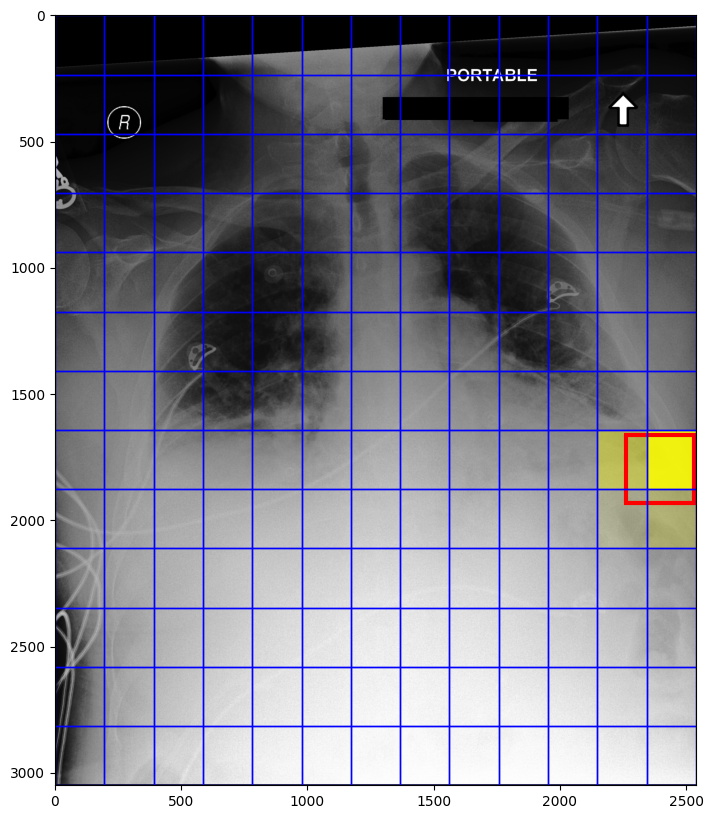

In [72]:
bbox_name = 'left costophrenic angle'
bbox_idx = tmp['bbox_phrases'].index(bbox_name)
visualize_attention_map(
    image_path='/mnt/data/mimic-cxr-jpg/images/p15/p15567127/s55519669/ffc6b502-4bc15b04-84915927-6252a020-778ae624.jpg',
    attention_map=tmp2['phrase_grounding_masks'][i][bbox_idx].reshape(13,13)**0.3,
    figsize=(10,10),
    bbox=tmp2['bbox_coords'][i][bbox_idx],
    draw_grid=True,
)